In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import tree
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score
from sklearn import metrics
import itertools
import time

In [2]:
ds = pd.read_csv("adult.csv")
print(ds.shape)
ds.head()


(48842, 15)


,age,workclass,final weight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
ds.shape()

TypeError: 'tuple' object is not callable

In [4]:
# frequency for categorical attributes
columns =['workclass', 'education','marital-status','relationship', 'race','gender', 'native-country','occupation', 'income'] 
for i in columns:
    print (i)
    print (ds[i].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64
relationship
Husband           19716
Not-in-family     12583
Own-ch

In [5]:
#fill missing values of relevant attributes with NaNs to make them identifiable
ds[['workclass','final weight','occupation','native-country']] = ds[['workclass','final weight','occupation','native-country']].replace('?',np.NaN)
ds.head()

,age,workclass,final weight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
#missing values of age attribute are set to the average of all values of that attribute 
ds['age'].fillna((ds['age'].mean()), inplace=True)

#missing values of workclass attribute are set to the mode of all values of that attribute 
ds=ds.fillna(ds['workclass'].value_counts().index[0])

#missing values of occupation attribute are set to the mode of all values of that attribute 
ds=ds.fillna(ds['occupation'].value_counts().index[0])

#missing values of native-country attribute are set to the mode of all values of that attribute 
ds=ds.fillna(ds['native-country'].value_counts().index[0])

#final check to see that none of the attributes have missing values
(ds[['age','workclass','final weight','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country']]==np.NaN).sum()


age                0
workclass          0
final weight       0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [7]:
#representing income class label of <=50 and >50 as 0 and 1 respectively 
ds['income']=ds['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
ds.head()

,age,workclass,final weight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Private,Own-child,White,Female,0,0,30,United-States,0


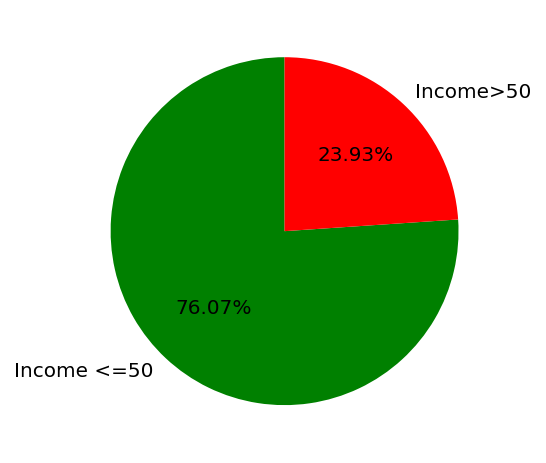

In [8]:
#visulaisation of target class (income label)
class_0=(ds[['income']]==0).sum()
class_1= (ds[['income']]==1).sum()
outcome = [int(class_0),int(class_1)]
label = ['Income <=50', 'Income>50']
colors = ['g', 'r']
plt.pie(outcome, labels=label, colors=colors, startangle=90, autopct='%.2f%%')
plt.show()

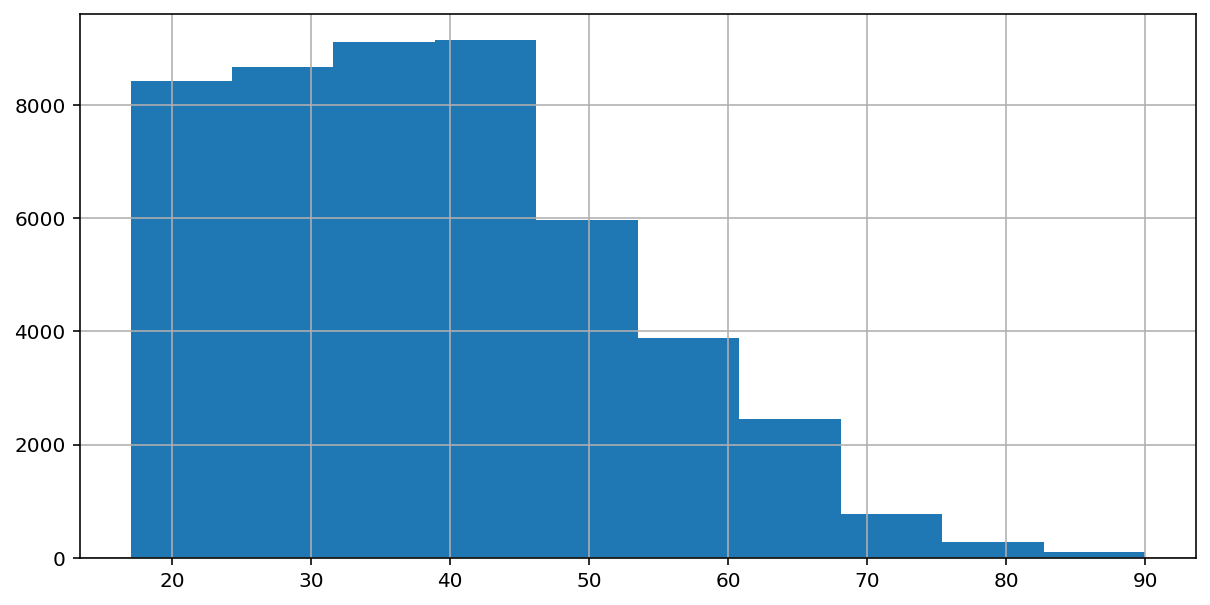

In [9]:
#histogram for age
ds['age'].hist(figsize=(10,5))
plt.show()

In [10]:
#number of instances which are outliers with respect to age 
ds[ds['age']>70].shape


(868, 15)

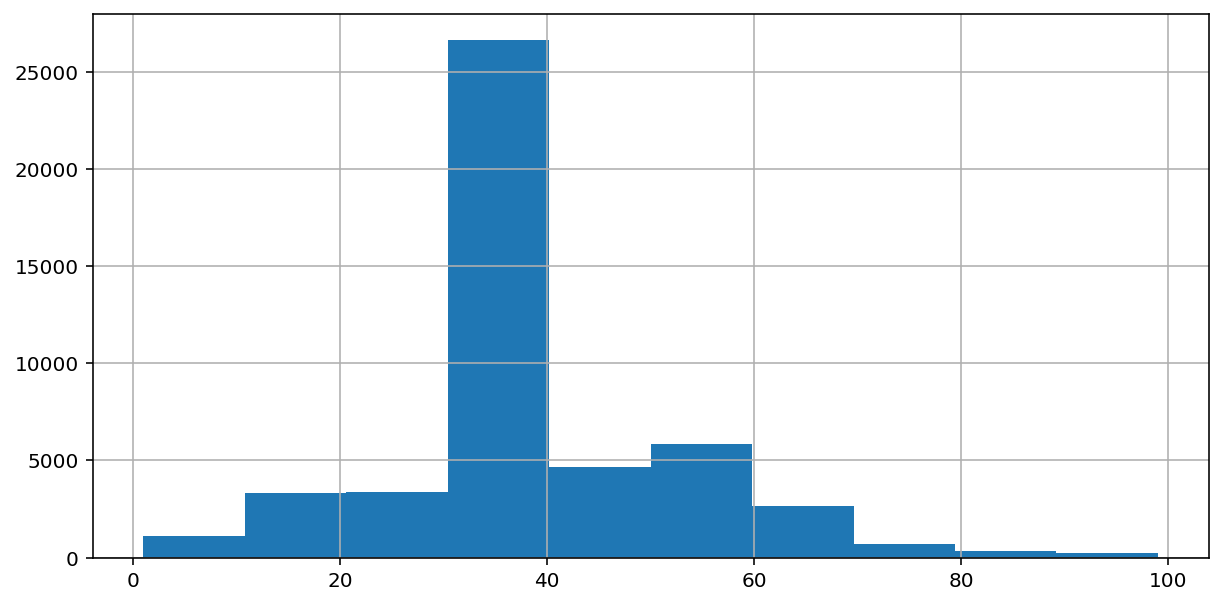

In [11]:
#histogram for hours per week
ds['hours-per-week'].hist(figsize=(10,5))
plt.show()

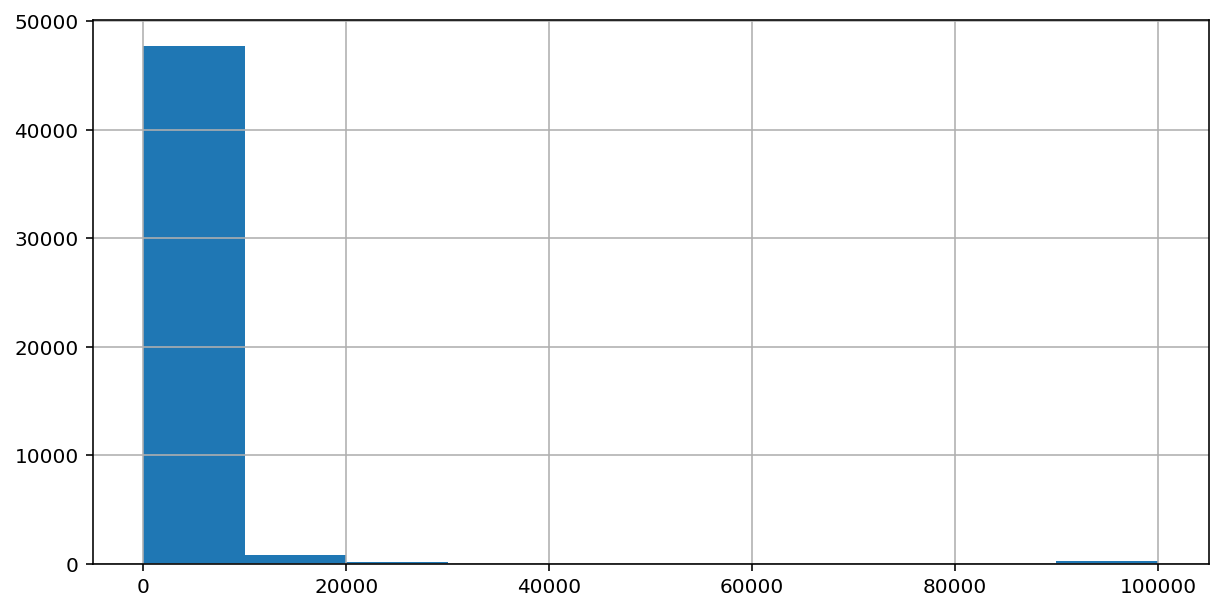

In [12]:
#histogram for capital gain
ds['capital-gain'].hist(figsize=(10,5))
plt.show()

In [13]:
#number of instances which are outliers with respect to capital gain
ds[ds['capital-gain']>10000].shape


(1134, 15)

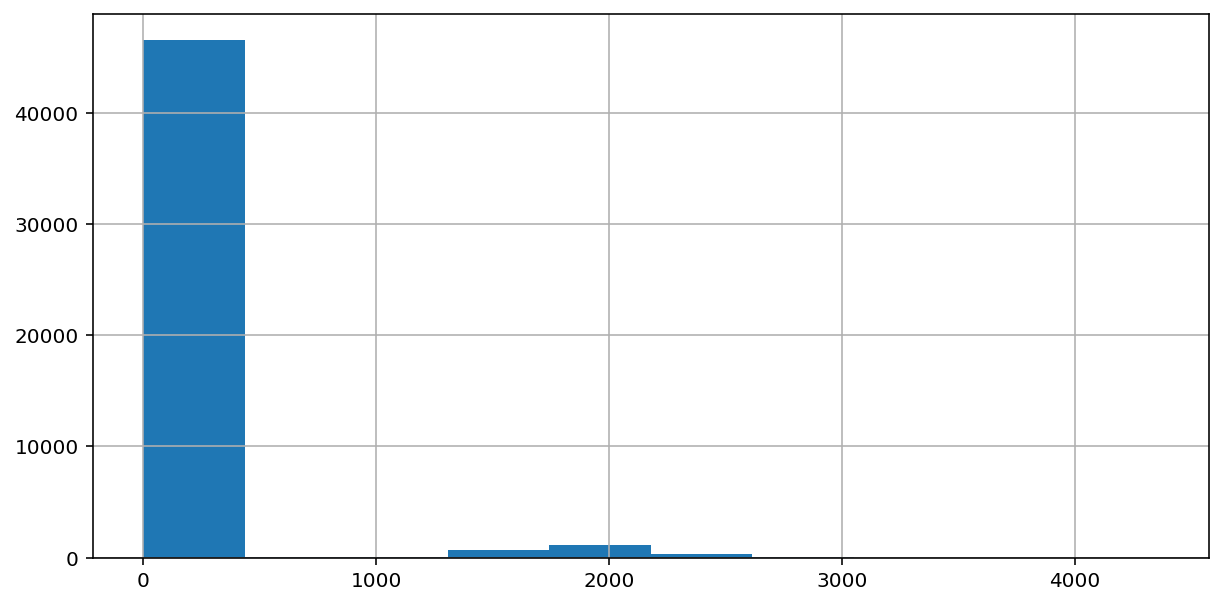

In [14]:
#histogram for capital loss
ds['capital-loss'].hist(figsize=(10,5))
plt.show()

In [15]:
#number of instances having non zero capital-loss values
ds[ds["capital-loss"]>0].shape


(2282, 15)

In [6]:
#distribution for relationship
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,6)) 
sns.countplot(y="relationship", data=ds)


#distribution for race
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,6)) 
sns.countplot(y="race", data=ds)



#distribution for gender
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="gender", data=ds)


#distribution for Native country
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,10)) 
sns.countplot(y="native-country", data=ds)

#distribution for work class
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="workclass", data=ds)

#distribution for education
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,10)) 
sns.countplot(y="education", data=ds)

#distribution for marital status
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=ds)

#distribution for work class
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,8)) 
sns.countplot(y="workclass", data=ds)

#distribution for education
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,8)) 
sns.countplot(y="education", data=ds)

#distribution for marital status
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,6)) 
sns.countplot(y="marital-status", data=ds)



NameError: name 'plt' is not defined

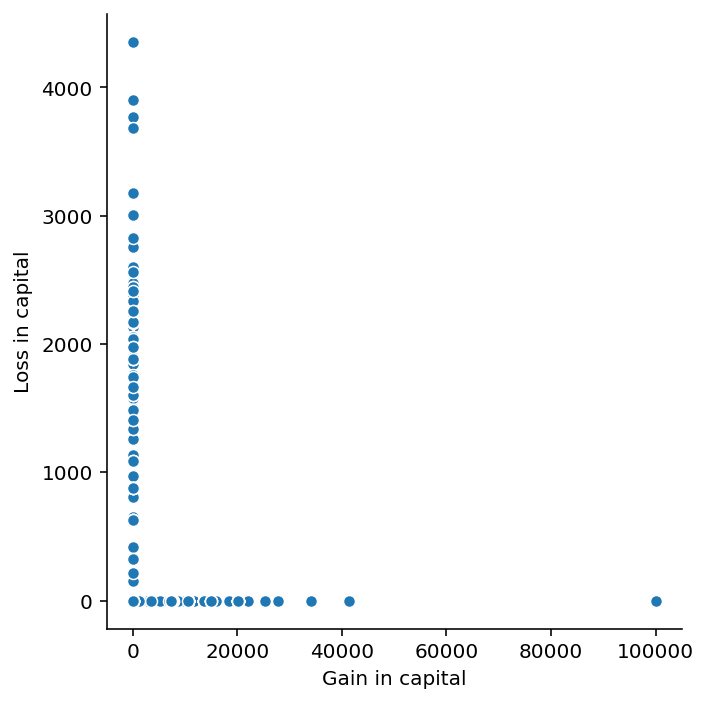

In [16]:
#relationship between gain and loss in capital
sns.relplot('capital-gain','capital-loss', data= ds)
plt.xlabel('Gain in capital')
plt.ylabel('Loss in capital')
plt.show()

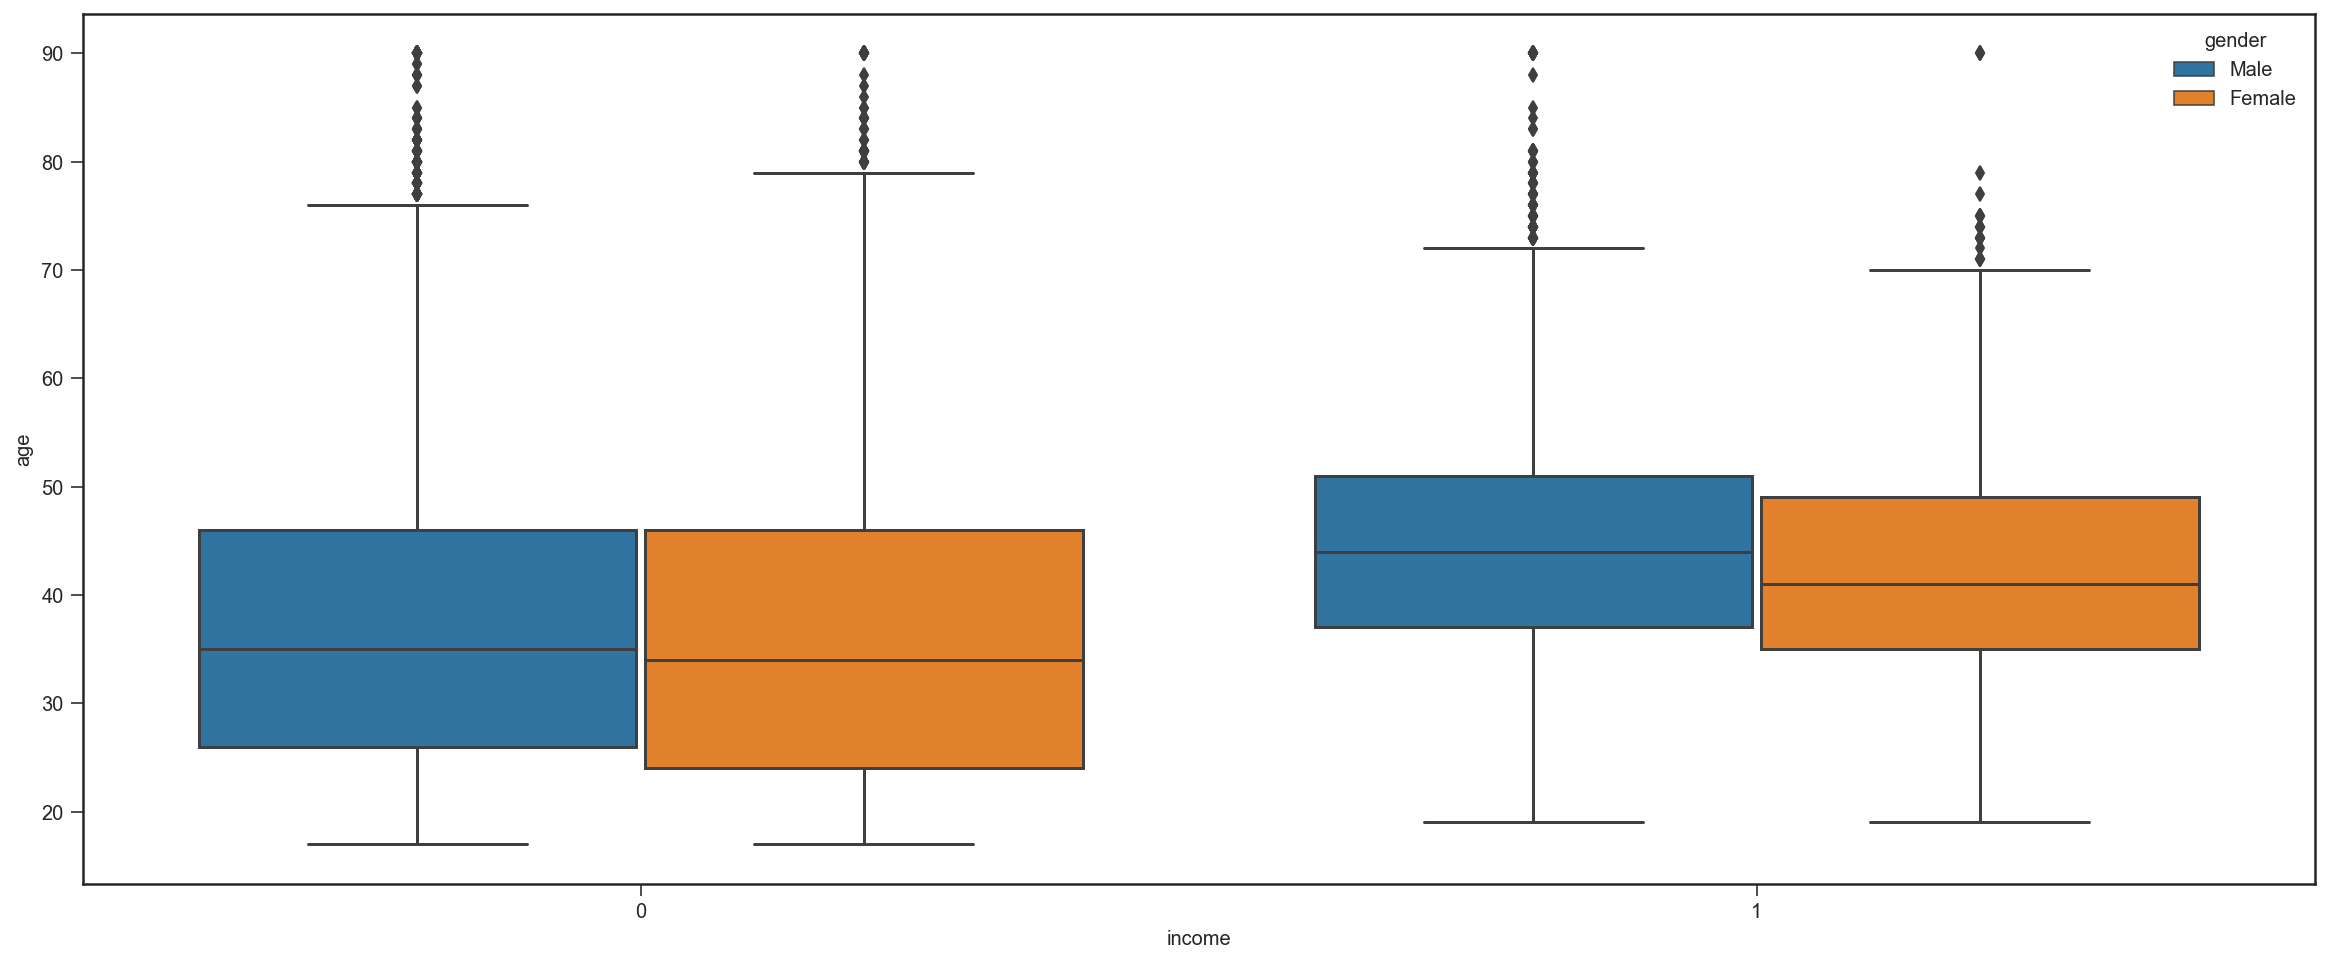

In [18]:
#multivariate analysis between income, age and gender
plt.figure(figsize=(20,8))
sns.boxplot(x='income', y='age',hue='gender',data=ds)
plt.show()

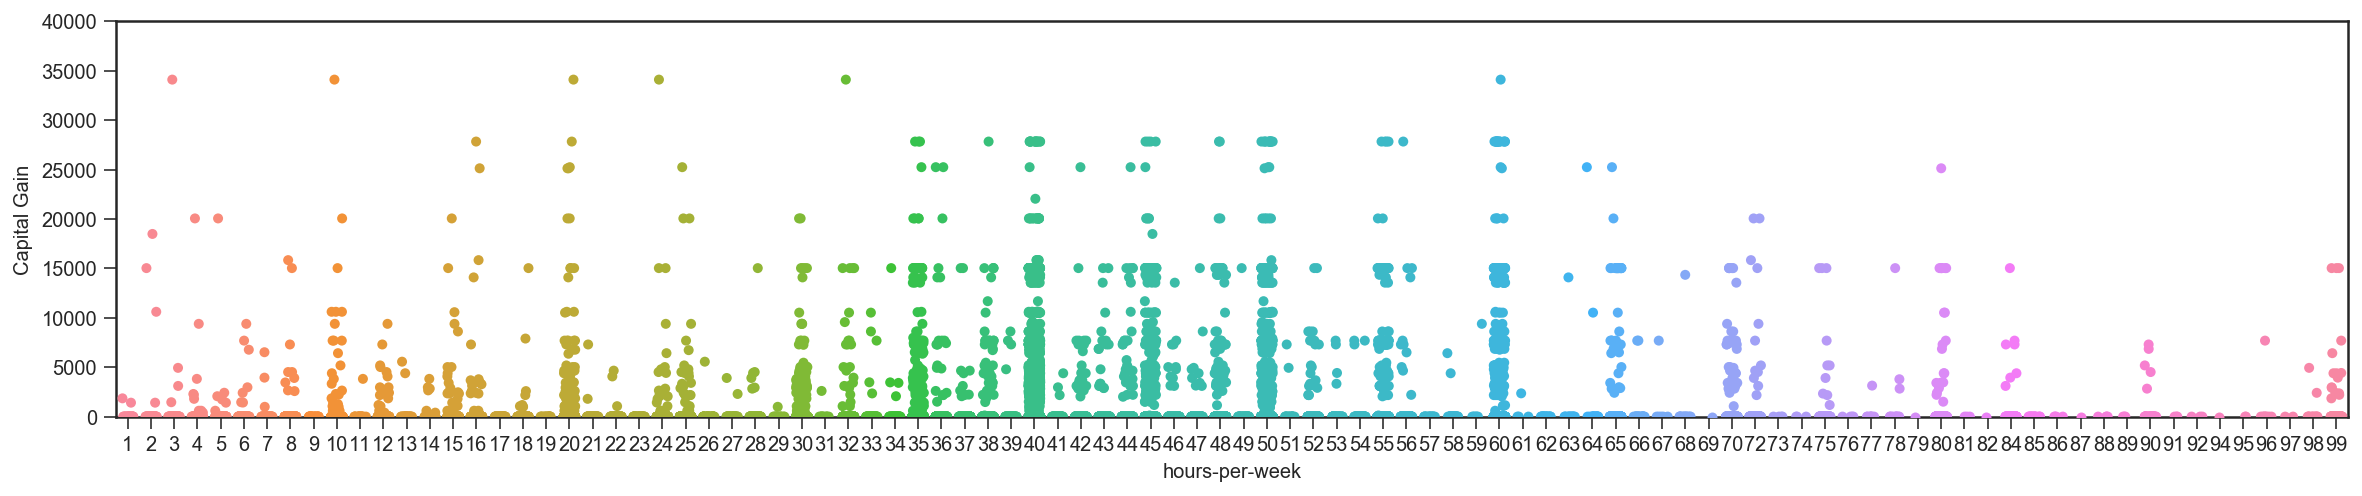

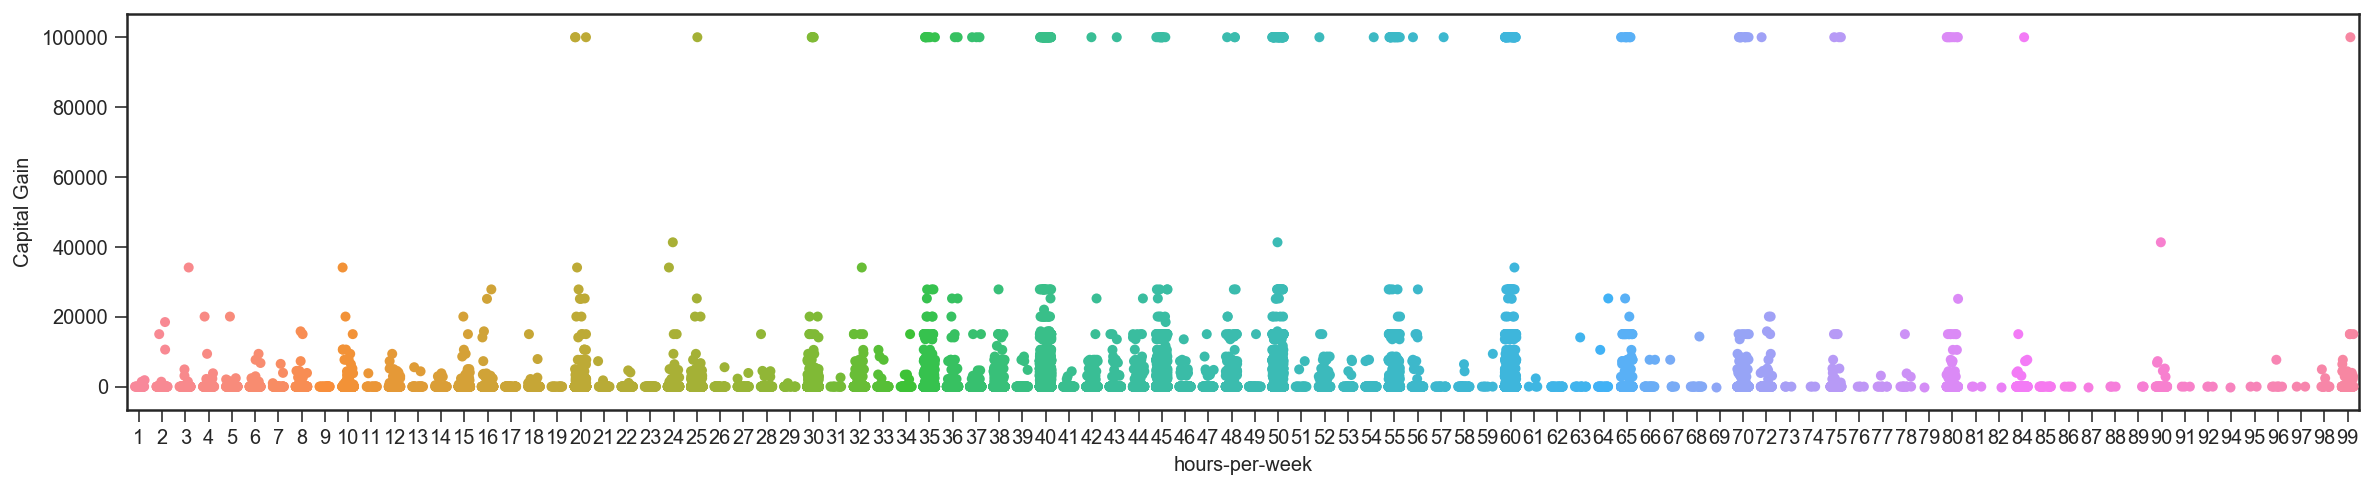

In [20]:
#multivariate anakysis between capital-gain and hours per week
figure = plt.figure(figsize = (20,8))
x = figure.add_subplot(2,1,2)
sns.stripplot('hours-per-week', 'capital-gain', data = ds,jitter = 0.25);
plt.xlabel('hours-per-week',fontsize = 10);
plt.ylabel('Capital Gain',fontsize = 10);
plt.ylim(0,40000);

figure = plt.figure(figsize = (20,8))
x = figure.add_subplot(2,1,1)
sns.stripplot('hours-per-week', 'capital-gain', data = ds,jitter = 0.25,ax = x);
plt.xlabel('hours-per-week',fontsize = 10);
plt.ylabel('Capital Gain',fontsize = 10);

In [9]:
#convert categorical attributes to numerical 
# Feature Selection and Encoding
from sklearn.preprocessing import LabelEncoder
ds = ds.apply(LabelEncoder().fit_transform)
ds.head(10)

,age,workclass,final weight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,14385,1,6,4,6,3,2,1,0,0,39,39,0
1,21,3,27674,11,8,2,4,0,4,1,0,0,49,39,0
2,11,1,21161,7,11,2,11,0,4,1,0,0,39,39,1
3,27,3,6173,15,9,2,6,0,2,1,98,0,39,39,1
4,1,3,363,15,9,4,9,3,4,0,0,0,29,39,0
5,17,3,11421,0,5,4,7,1,4,1,0,0,29,39,0
6,12,3,14412,11,8,4,9,4,2,1,0,0,39,39,0
7,46,5,491,14,14,2,10,0,4,1,52,0,31,39,1
8,7,3,22519,15,9,4,7,4,4,0,0,0,39,39,0
9,38,3,532,5,3,2,2,0,4,1,0,0,9,39,0


In [22]:
ds.head()

,age,workclass,final weight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,14385,1,6,4,6,3,2,1,0,0,39,39,0
1,21,3,27674,11,8,2,4,0,4,1,0,0,49,39,0
2,11,1,21161,7,11,2,11,0,4,1,0,0,39,39,1
3,27,3,6173,15,9,2,6,0,2,1,98,0,39,39,1
4,1,3,363,15,9,4,9,3,4,0,0,0,29,39,0


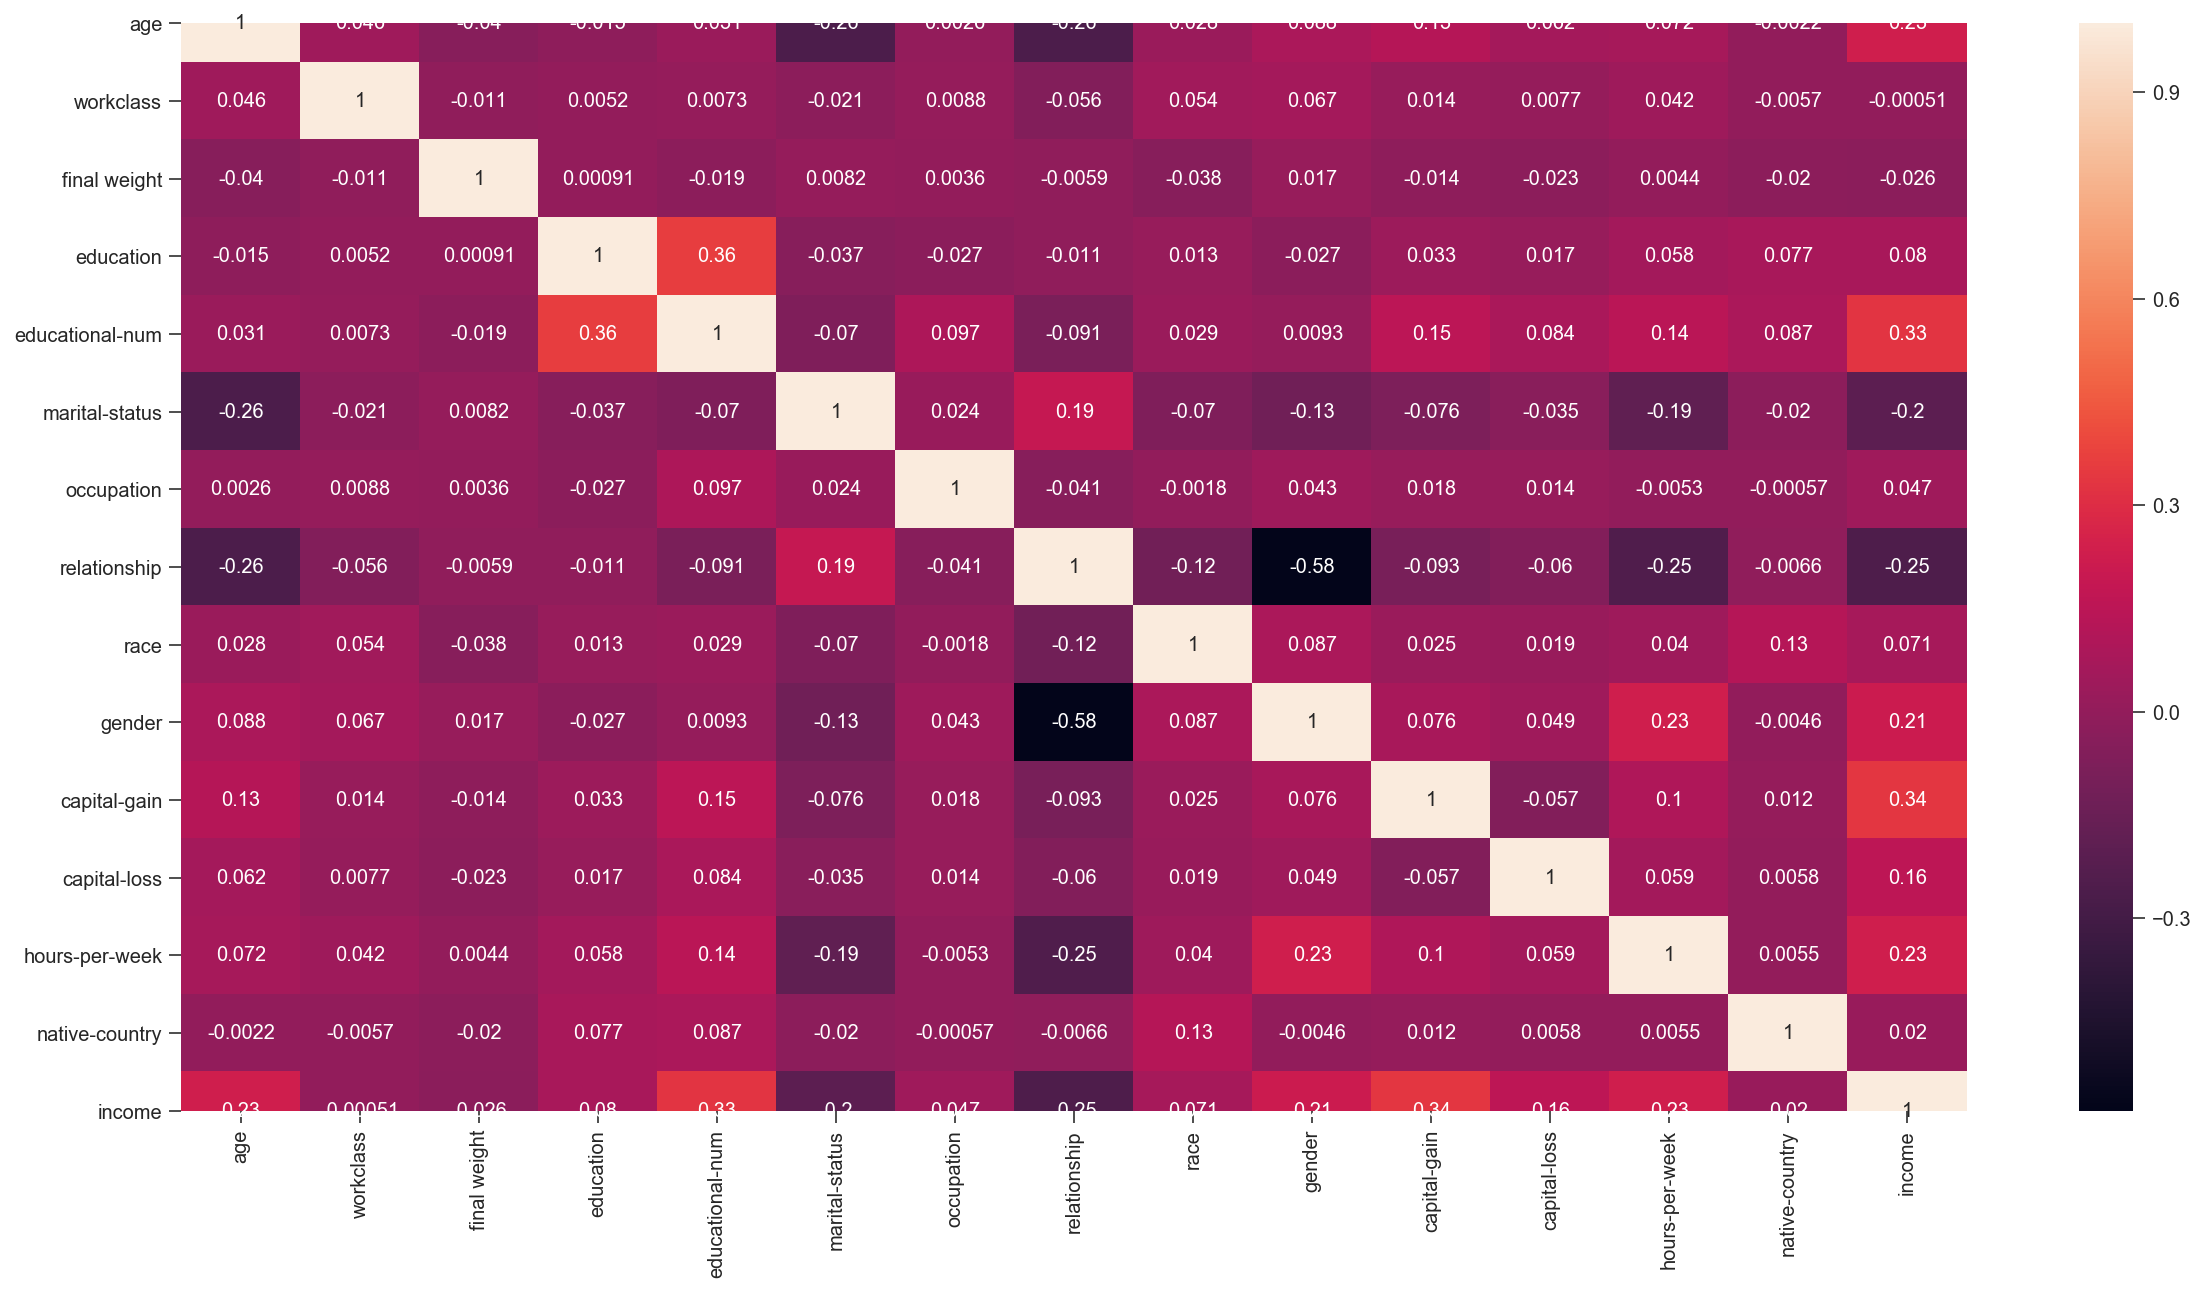

In [23]:
#Correlation between attributes
corr = ds.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [11]:
#Splitting data into training and test set
from sklearn import preprocessing
X = ds[['age','workclass','final weight','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country']]
y = ds['income']
#normalisation of values
x_norm = preprocessing.normalize(X)
X_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=2)
X_train.shape

(39073, 14)

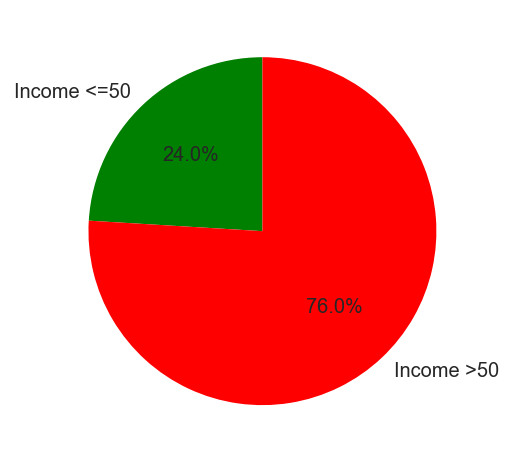

In [25]:
#pie chart for income distribution in training data
income = [y_train[y_train==1].count(),y_train[y_train==0].count()]
label = ['Income <=50', 'Income >50']
colors = ['g', 'r']
plt.pie(income, labels=label, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()


In [26]:
plt.figure
sns.set(style='ticks')
sns.pairplot(ds, hue='income')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f4da625c620> (for post_execute):


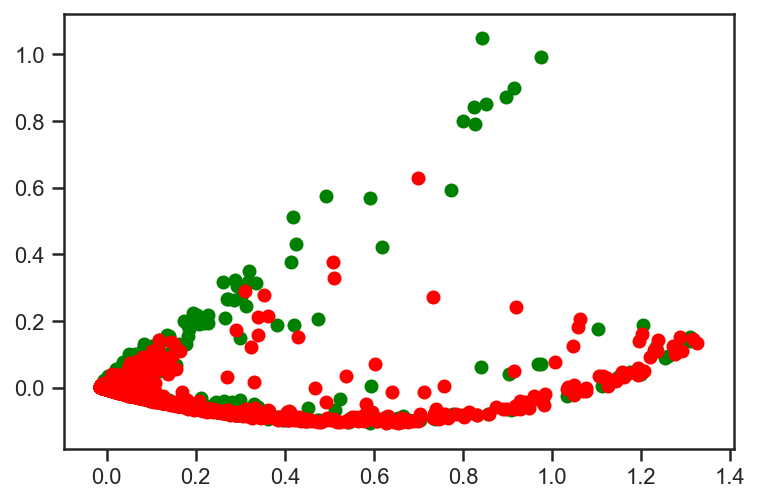

In [27]:
#principal component analysis
pca = sklearnPCA(n_components=2)
pca_new = pd.DataFrame(pca.fit_transform(x_norm))
xx = pca_new[0]
yy = pca_new[1]
plt.scatter(xx[y==1], yy[y==1], label='Income <=50', c='green')
plt.scatter(xx[y==0], yy[y==0], label='Income >50', c='red')
plt.show()

In [12]:
def plot_confusion_matrix(cm, classes, title='CONFUSION MATRIX', cmap=plt.cm.Reds):
    plt.figure()
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')

Accuracy: 0.765277919950865
F-score 0.005206073752711497
[[7470    4]
 [2289    6]]
--- 85.05261635780334 seconds ---


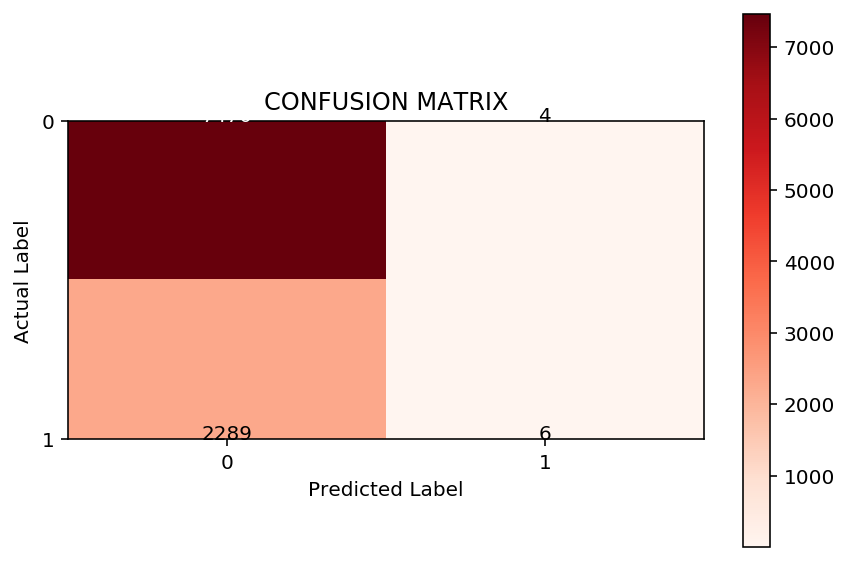

In [15]:
start_time = time.time()
clf1 = SVC(kernel='rbf', gamma=0.1, C=1)
clf1.fit(X_train, y_train)
pred1 = clf1.predict(x_test)
sc1 = clf1.score(x_test,y_test)
f1 = f1_score(y_test,pred1)
print('Accuracy: '+str(sc1))
print('F-score '+str(f1))
cm = confusion_matrix(y_test,pred1,labels=[0,1])
plot_confusion_matrix(cm,classes=[0,1])
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.7631282628723514
F-score 0.09254901960784315
[[7337  137]
 [2177  118]]
--- 302.62344336509705 seconds ---


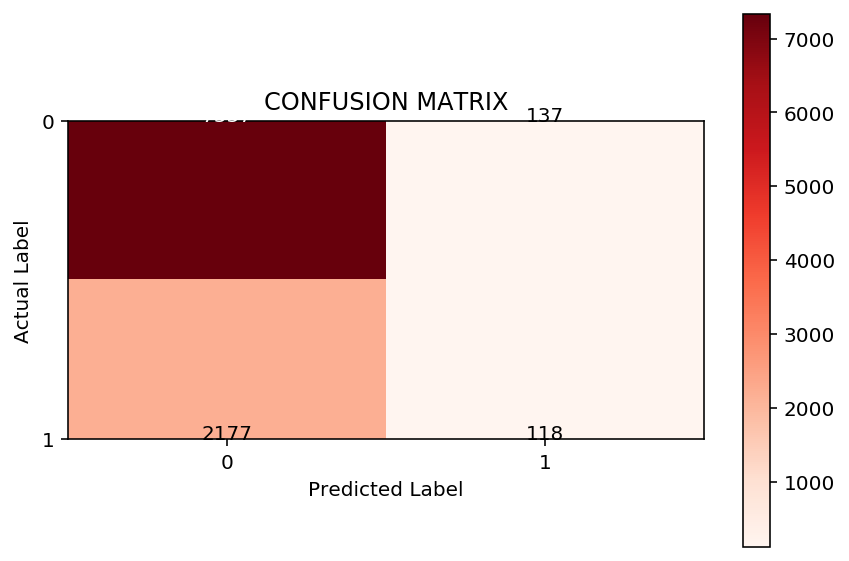

In [17]:
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
pred2 = clf2.predict(x_test)
sc2 = clf2.score(x_test,y_test)
f2 = f1_score(y_test,pred2)
print('Accuracy: '+str(sc2))
print('F-score '+str(f2))
cm = confusion_matrix(y_test,pred2,labels=[0,1])
plot_confusion_matrix(cm,classes=[0,1])
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.8102159893540792
F-score 0.37826961770623746
[[7351  123]
 [1731  564]]
--- 0.6420607566833496 seconds ---


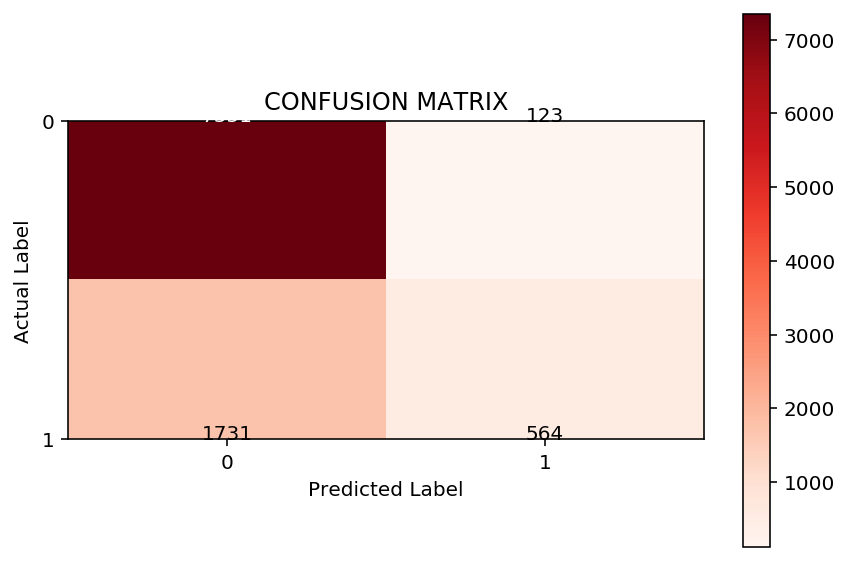

In [18]:
start_time = time.time()
clf3 = RandomForestClassifier(max_depth=6, n_estimators=8, random_state=0)
clf3.fit(X_train,y_train)
pred3 = clf3.predict(x_test)
sc3 = clf3.score(x_test,y_test)
f3 = f1_score(y_test,pred3)
print('Accuracy: '+str(sc3))
print('F-score '+str(f3))
cm = confusion_matrix(y_test,pred3,labels=[0,1])
plot_confusion_matrix(cm,classes=[0,1])
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.7708845208845209
F-measure: 0.060428031892572384
[[7458   16]
 [2223   72]]
--- 0.3431987762451172 seconds ---


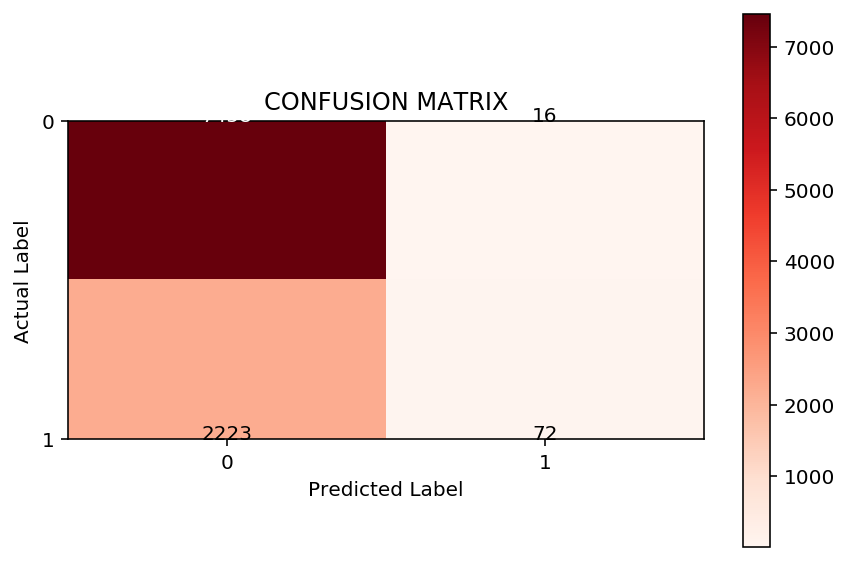

In [19]:
#max_voting
start_time = time.time()
y_test1 = np.array(y_test)
count=0
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, statistics.mode([pred1[i],pred2[i],pred3[i]]))
for i in range(len(final_pred)):
    if final_pred[i]==y_test1[i]:
        count+=1
sc=count/(i)
print('Accuracy: '+str(sc))
f = f1_score(y_test,final_pred)
print('F-measure: '+str(f))
cm = confusion_matrix(y_test,final_pred,labels=[0,1])
plot_confusion_matrix(cm,classes=[0,1])
print("--- %s seconds ---" % (time.time() - start_time))